In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://samples.openweathermap.org/data/2.5/forecast/hourly?zip=70000&appid=b69 07d289e10d714a6e88b30761fae22"
r = requests.get(url)
json = r.json()

In [3]:
df = pd.json_normalize(json['list'], max_level=1)
weather = df["weather"].apply(lambda x: pd.Series(x[0])).add_prefix("weather.")
df = pd.concat([df.drop('weather', axis=1), weather], axis=1)
df['dt_txt'] = pd.to_datetime(df['dt_txt'])
df.head(3)

,dt,dt_txt,main.temp,main.temp_min,main.temp_max,main.pressure,main.sea_level,main.grnd_level,main.humidity,main.temp_kf,clouds.all,wind.speed,wind.deg,rain.1h,sys.pod,weather.id,weather.main,weather.description,weather.icon
0,1553709600,2019-03-27 18:00:00,286.44,286.258,286.44,1015.820,1015.820,1002.193,100,0.18,86,5.51,202.816,0.812,d,500,Rain,light rain,10d
1,1553713200,2019-03-27 19:00:00,286.43,286.300,286.43,1016.183,1016.183,1002.667,100,0.13,92,4.84,206.141,0.625,d,500,Rain,light rain,10d
2,1553716800,2019-03-27 20:00:00,286.60,286.507,286.60,1016.462,1016.462,1003.128,100,0.09,94,4.58,216.201,0.437,d,500,Rain,light rain,10d


### Vẽ biểu đồ áp suất không khí theo từng ngày

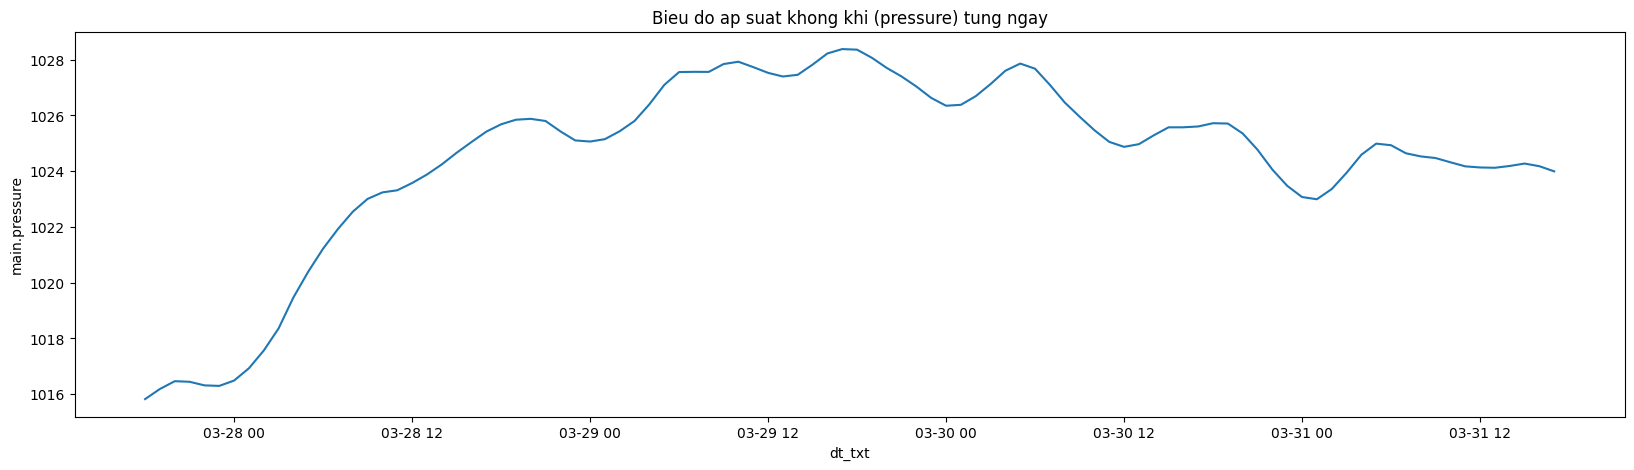

In [4]:
plt.figure(figsize=(20,5))
plt.title("Bieu do ap suat khong khi (pressure) tung ngay")
sns.lineplot(data=df, x='dt_txt', y="main.pressure")
plt.show()

## Vẽ biểu đồ tốc độ gió theo từng ngày

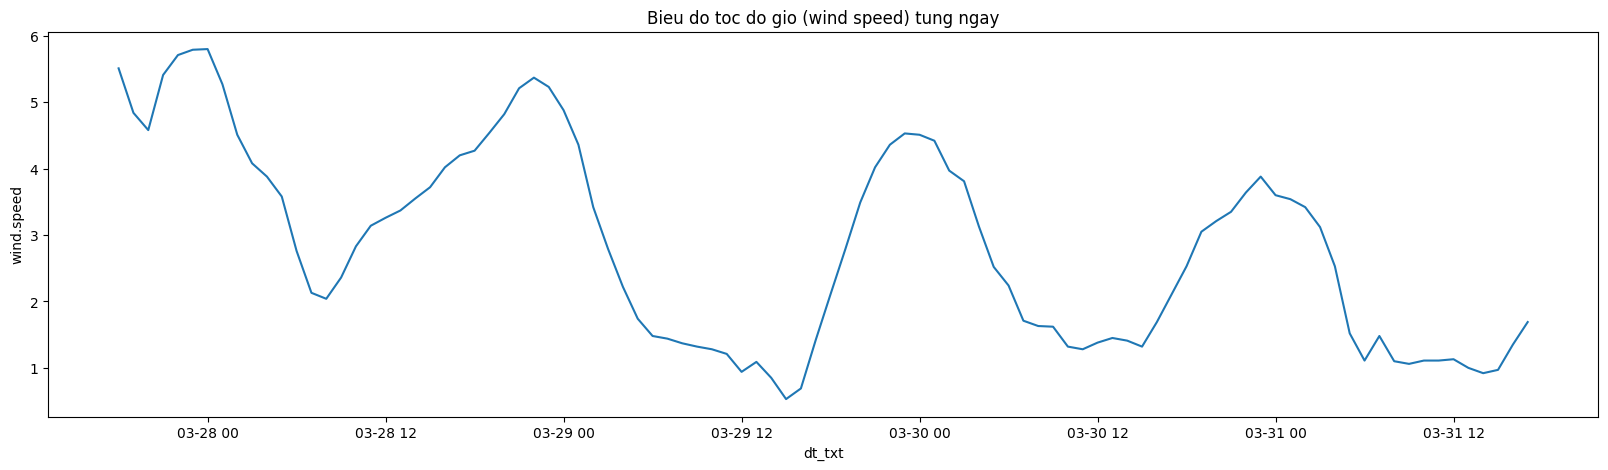

In [5]:
plt.figure(figsize=(20,5))
plt.title("Bieu do toc do gio (wind speed) tung ngay")
sns.lineplot(data=df, x='dt_txt', y="wind.speed")
plt.show()